# Probability Mass Functions and Histograms

Notes: https://landscape.acalonia.com/wlf/a4f4c3c5-544e-49ea-a995-d3fea289fff4

Using Python, create a plot of the probability mass function (i.e. the probabilities of individual outcomes) for the following distributions.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint, binom, poisson


def plot_pmf(x, y, title):
    plt.plot(x, y, "bo")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(title)


(a) Discrete uniform distribution with $a=1,b=6$ (i.e. with outcomes $\left\{ 1,2,3,4,5,6\right\}$ equally likely), with non-zero PMF values $\frac{1}{b-a+1}$ at $x=a, a+1,a+2,...b-1,b$.
Here $a$ and $b$ are, in general, integers with $b>a$.

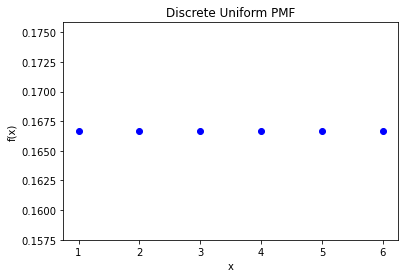

In [127]:
a = 1
b = 6
x = np.arange(a, b+1)
p = 1 / (b - a + 1)
y = np.full(len(x), p)
plot_pmf(x, y, "Discrete Uniform PMF")

(b) Binomial distribution with $p=0.3,n=10$, with non-zero PMF values ${n \choose x} p^x (1-p)^{n-x}, \quad x=0,1,2,...,n$
Here $n$ is a positive integer and $p \in (0,1)$, in general.

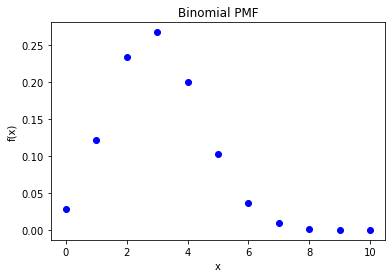

In [43]:
p = 0.3
n = 10
x = np.arange(n+1)
y = binom.pmf(x, n, p)
plot_pmf(x, y, "Binomial PMF")

(c) Poisson distribution with $\lambda=5$, with non-zero PMF values $\frac{1}{x!}\lambda^x e^{-\lambda},\quad x=0,1,2,...$
 
Here $\lambda$ is a positive real number, in general.

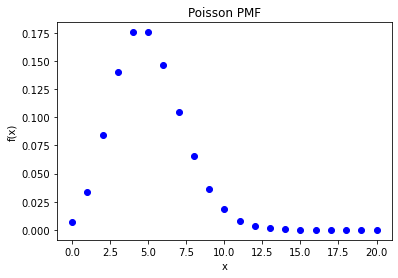

In [53]:
l = 5
n = 20
x = np.arange(n+1)
y = poisson.pmf(x, l)
plot_pmf(x, y, "Poisson PMF")

For the distributions in the previous task simulate $1000000$ random draws and create histograms.
Do the shapes of your histograms match reasonably well the shapes of the probability mass functions?
Calculate the proportion of your simulated observations that correspond to (say) $x=4$ for each of the distributions (separately) and compare it to the exact functional values of the PMFs at $x=4$. If they don't approximately agree, check for coding mistakes.

(array([166305., 166009., 167018., 166217., 167118., 167333.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

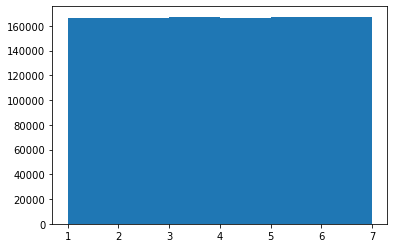

In [122]:
# uniform 

size = 1_000_000
a = 1
b = 6
bins = np.arange(a, b+2)
uniform_draws = randint.rvs(low=a, high=b+1, size=size)
plt.hist(uniform_draws, bins=bins)

In [130]:
def get_probability_at_x(draws, x):
    count = len(draws[draws == 4])
    total = len(draws)
    return count / total

# compare probability of x = 4
print(1 / (b - a + 1))
print(get_probability_at_x(uniform_draws, 4))


0.16666666666666666
0.166217


(array([2.82610e+04, 1.20887e+05, 2.33630e+05, 2.66326e+05, 2.00330e+05,
        1.03124e+05, 3.68930e+04, 8.94600e+03, 1.46500e+03, 1.38000e+02]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

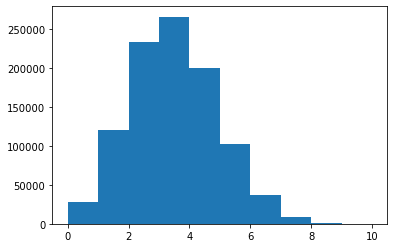

In [131]:
# binomial

p = 0.3
n = 10
bins = np.arange(n+1)
binom_draws = binom.rvs(n=n, p=p, size=size)
plt.hist(binom_draws, bins=bins)

In [134]:
# compare probability of x = 4
print(binom.pmf(4, n, p))
print(get_probability_at_x(binom_draws, 4))

0.20012094900000013
0.20033


(array([6.67500e+03, 3.38750e+04, 8.39740e+04, 1.40504e+05, 1.76087e+05,
        1.75000e+05, 1.46072e+05, 1.04192e+05, 6.53310e+04, 3.63540e+04,
        1.81490e+04, 8.33700e+03, 3.43700e+03, 1.32100e+03, 4.64000e+02,
        1.50000e+02, 4.90000e+01, 2.00000e+01, 8.00000e+00, 1.00000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

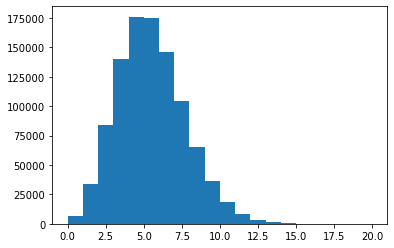

In [135]:
# poisson

l = 5
n = 20
bins = np.arange(n+1)
poisson_draws = poisson.rvs(l, size=size)
plt.hist(poisson_draws, bins=bins)

In [136]:
# compare probability of x = 4
print(poisson.pmf(4, l))
print(get_probability_at_x(poisson_draws, 4))

0.17546736976785063
0.176087
